<a href="https://colab.research.google.com/github/hrishikeshchavan99/Black-Friday-Dataset/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory data analysis for Black Friday Dataset**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [0]:
#eda-1.data cleaning 2.data visualization 3.data preprocessing

In [0]:
#first check data types

In [6]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [0]:
#here we have 5 numerical features and rest of them are object type.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [0]:
#as we can see Product_Category_2 and Product_Category_3 contain some null values.

In [10]:
list(train.columns)

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [11]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


##Removing null/missing values

In [12]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [0]:
#as we have only 30% data inside Product_Category_3 we would drop this coloumn

In [0]:
train.drop('Product_Category_3',axis=1,inplace=True)

In [15]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,365


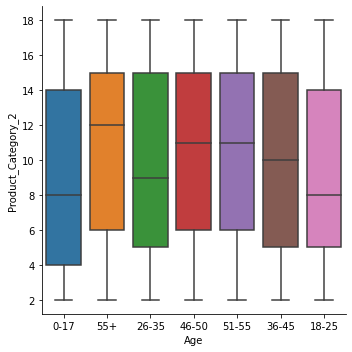

In [16]:
sns.catplot(y='Product_Category_2',x='Age',data=train,kind='box')

In [0]:
#as we can see Product_Category_2 has different mean values for different age category .
#hence we will replace Product_Category_2 nan values with appropriate mean values according to respective age category.

In [0]:
col=[train['Product_Category_2'],train['Age']]


In [0]:
def impute_2(col):
    age=col[1]
    product_Category_2=col[0]
    
    if pd.isnull(product_Category_2):
        if age=='0-17':
            return 8
        elif age=='55+':
            return 12
        elif age=='26-35':
            return 9
        elif age=='46-50':
            return 11
        elif age=='51-55':
            return 11
        elif age=='36-45':
            return 10
        else:
            return 8
    else:
        return product_Category_2

In [0]:
train['Product_Category_2']=train[['Product_Category_2','Age']].apply(impute_2,axis=1)

In [21]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,12.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,11.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,12.0,365


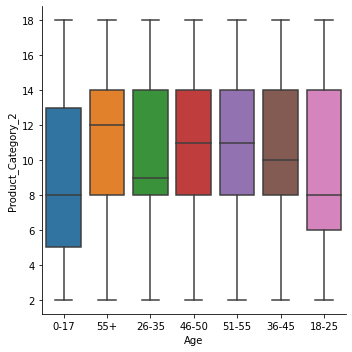

In [22]:
sns.catplot(y='Product_Category_2',x='Age',data=train,kind='box')

In [23]:
train['Product_Category_2'].value_counts()

8.0     99045
9.0     75120
14.0    55108
2.0     49217
16.0    43255
11.0    41302
15.0    37855
10.0    37706
5.0     26235
4.0     25677
6.0     16466
17.0    13320
12.0    12951
13.0    10531
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [24]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [0]:
#now userid and product id can't help us in ml algorithm .hence we would drop this columns

In [0]:
train.drop(['User_ID','Product_ID'],axis=1,inplace=True)


In [27]:
train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,8.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,8.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,12.0,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,11.0,368
550064,F,26-35,1,C,3,0,20,9.0,371
550065,F,26-35,15,B,4+,1,20,9.0,137
550066,F,55+,1,C,2,0,20,12.0,365


In [28]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [29]:
train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [30]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [31]:
train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [32]:
train.describe(include=['object'])

,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068
unique,2,7,3,5
top,M,26-35,B,1
freq,414259,219587,231173,193821


##univariate analysis

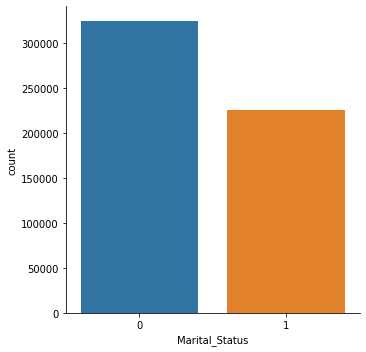

In [33]:
sns.catplot(x='Marital_Status',kind='count',data=train)

In [0]:
#no of people not married are in large amount than no of married people

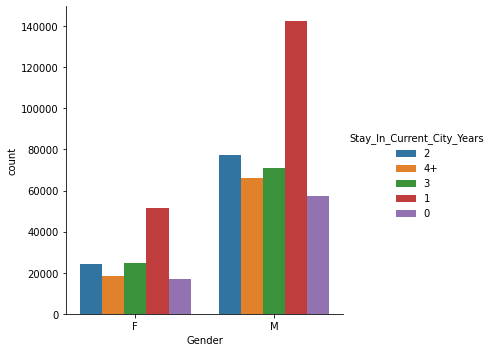

In [35]:
sns.catplot(x='Gender',kind='count',data=train,hue='Stay_In_Current_City_Years')

In [0]:
#as we can see male who are living in current city for 1 year are most likely gonna visit mall.

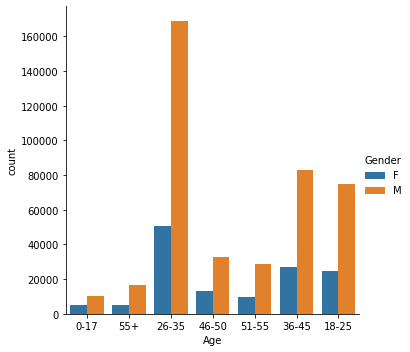

In [37]:
sns.catplot(x='Age',kind='count',data=train,hue='Gender')

In [0]:
#no of male category people in the age category between 26-35 are highest in dataset.
#in bivariate analysis we will see which category is gonna purchase in large amount.

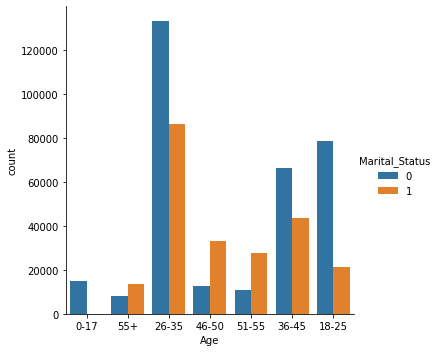

In [39]:
sns.catplot(x='Age',kind='count',data=train,hue='Marital_Status')

In [0]:
#and also people which are unmarried and also between age 26-35 are in large numbers.
#that means male who are unmarried and has age between 26-35 are in largest amount in dataset.

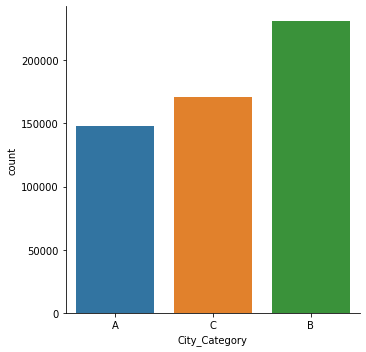

In [41]:
sns.catplot(x='City_Category',kind='count',data=train)

In [0]:
#most customers are from city category B

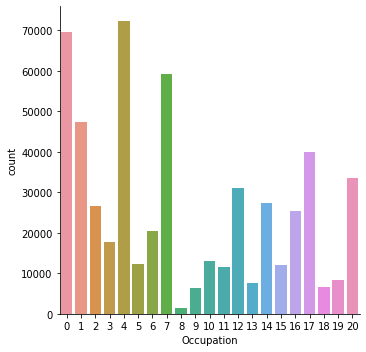

In [43]:
sns.catplot(x='Occupation',kind='count',data=train)

In [0]:
#people having occupation no 4 are most likely to visit mall followed by no 0 and 7.

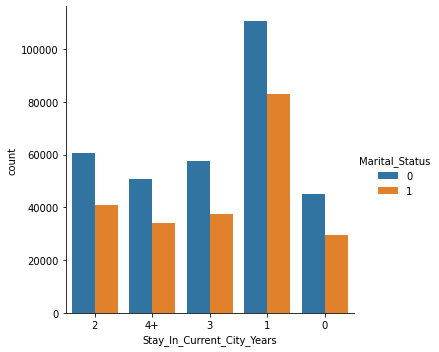

In [45]:
sns.catplot(x='Stay_In_Current_City_Years',kind='count',data=train,hue='Marital_Status')

In [0]:
#bivariate analysis

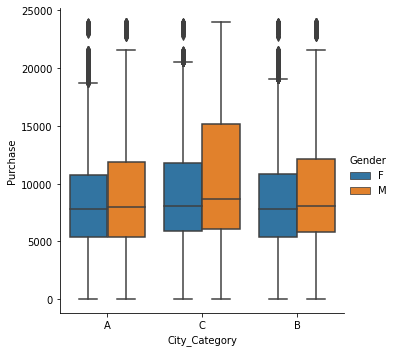

In [47]:
sns.catplot(x='City_Category',y='Purchase',data=train,kind='box',hue='Gender')

In [0]:
#people living in city c are having maximum purchase amount and most purchases are made between 5000-8000 .

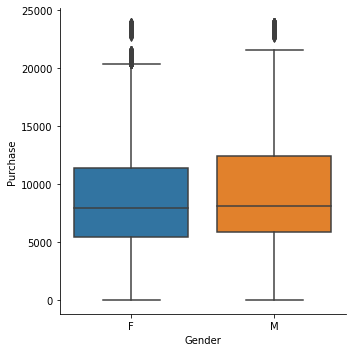

In [49]:
sns.catplot(x='Gender',y='Purchase',data=train,kind='box')

In [0]:
#although no of female are less,most of the females are purchasing products in mall.

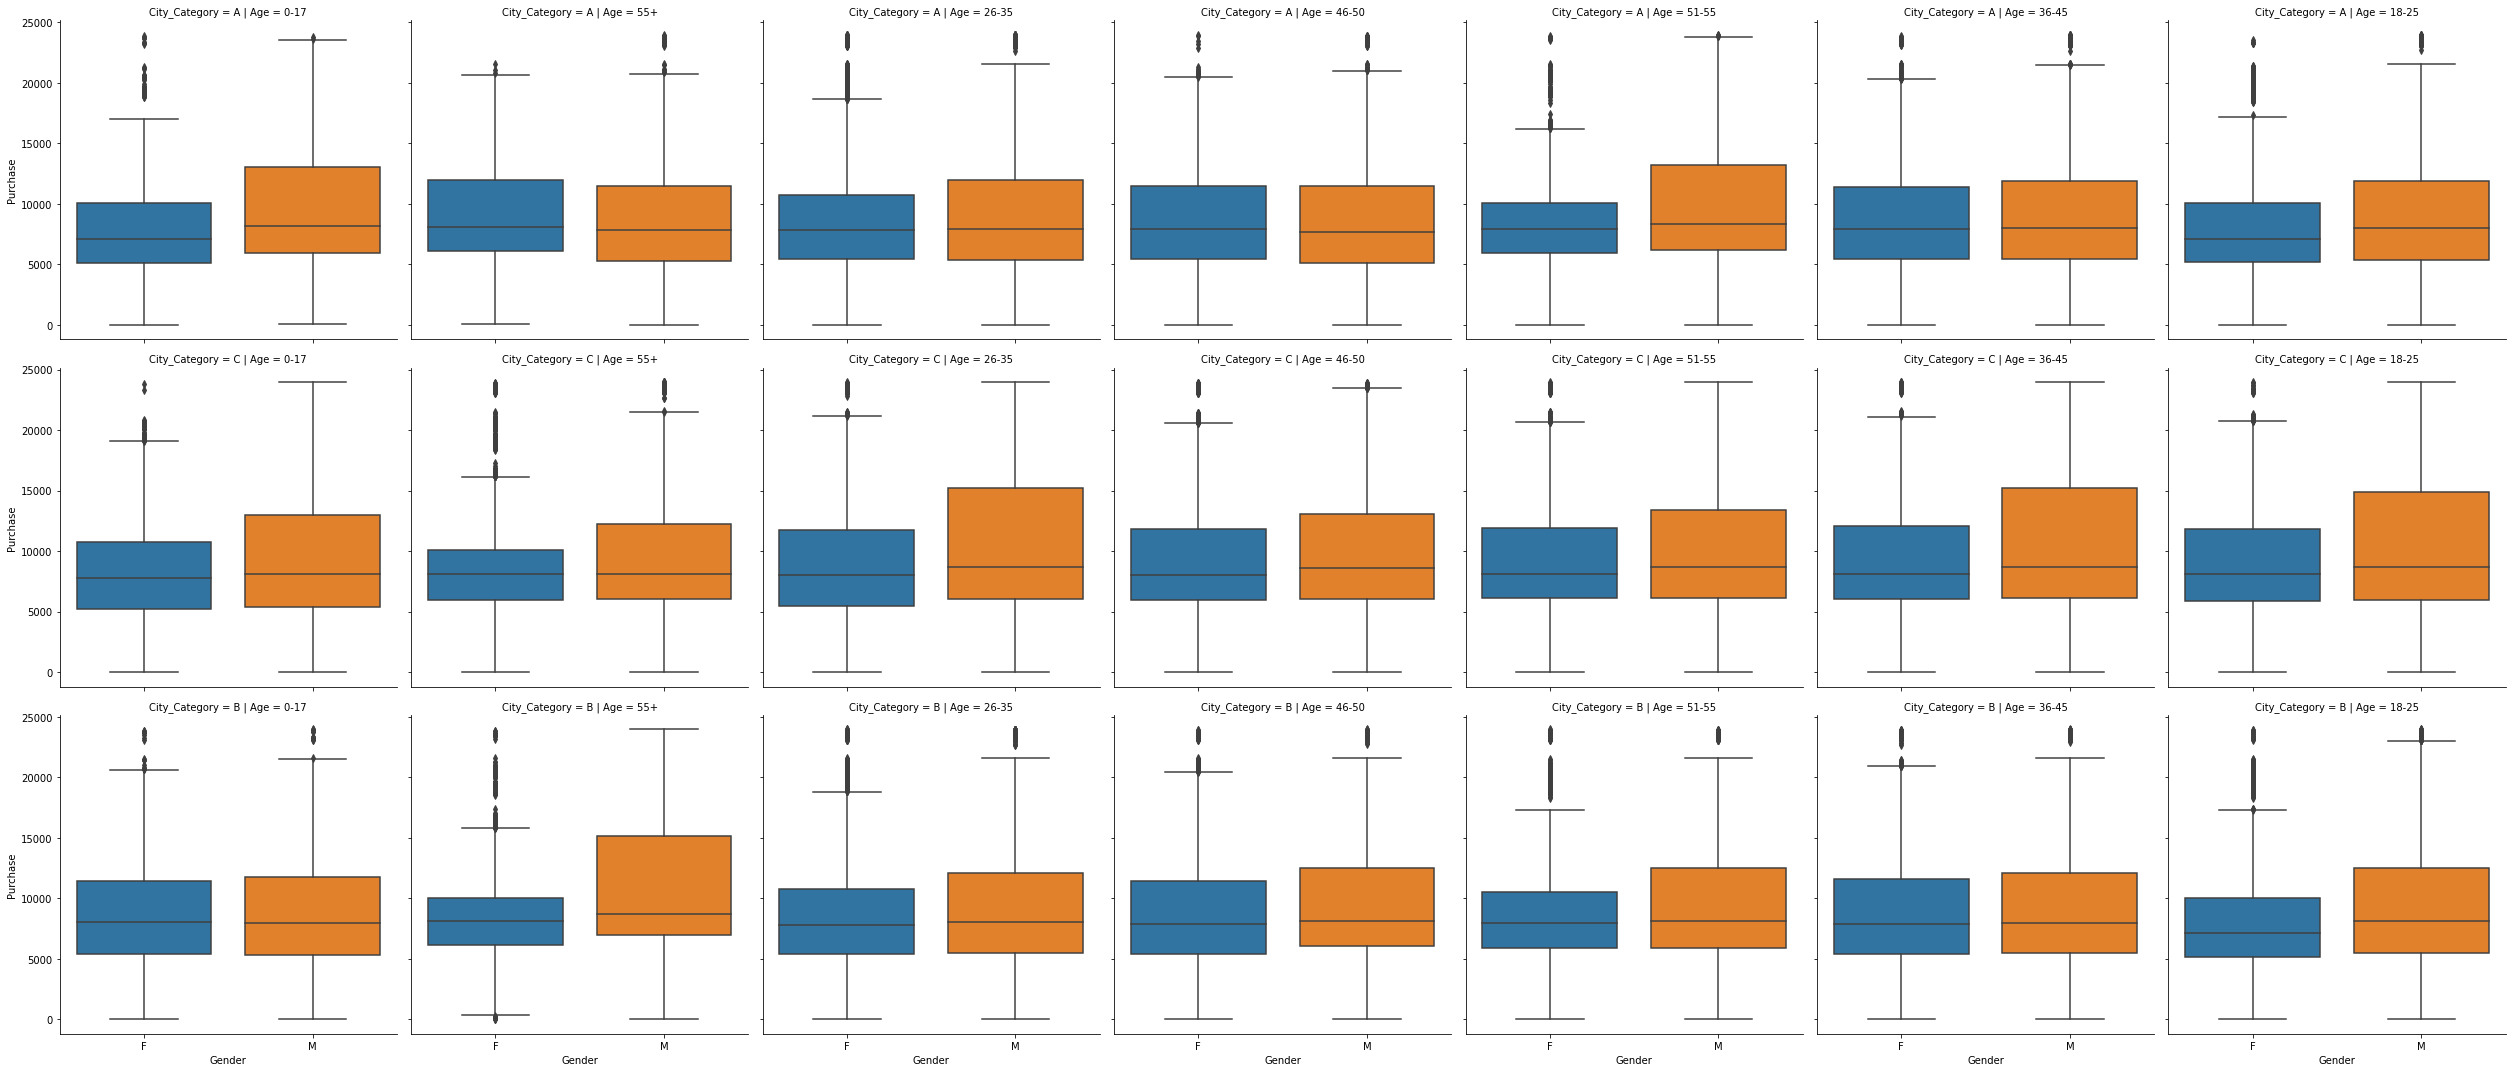

In [51]:
sns.catplot(x='Gender',y='Purchase',data=train,kind='box',col='Age',row='City_Category')

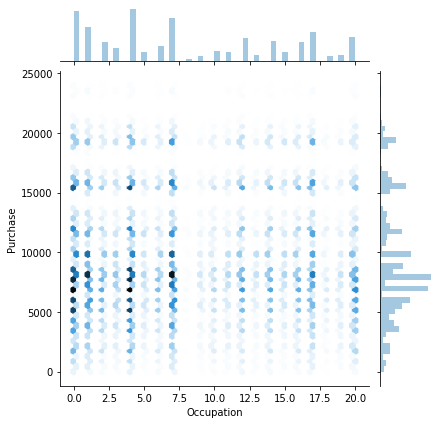

In [52]:
sns.jointplot(x='Occupation',y='Purchase',data=train,kind='hex')

In [0]:
#most purchases are in between 5000-10000
#occupation 4 is having highest purchases.followed by 0 and 7

In [0]:
sns.set(font_scale=1.2)

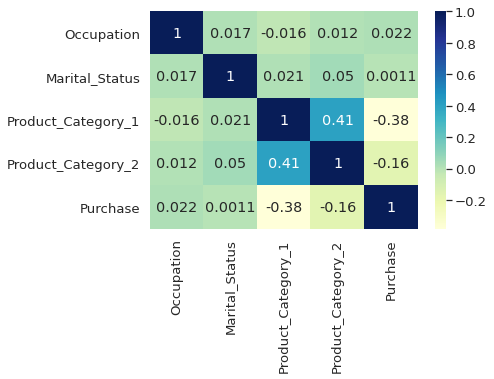

In [55]:
sns.heatmap(train.corr(method='spearman'),annot=True,cmap='YlGnBu')

insights from above plot<br>
occupation and maritalstatus are the features which are having positive corelation with purchase.<br>
increase in values of these features is likely to result in higher purchase<br>
Product_Category_1 and Product_Category_2 is having highest +ve corelation.<br>
Product_Category_1 and purchase is having negative corelation.that means when one value increases other decreases.<br>

In [56]:
train.corr(method='spearman')

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
Occupation,1.000000,0.016906,-0.015926,0.011766,0.022177
Marital_Status,0.016906,1.000000,0.021006,0.049520,0.001115
Product_Category_1,-0.015926,0.021006,1.000000,0.408365,-0.383355
Product_Category_2,0.011766,0.049520,0.408365,1.000000,-0.160016
Purchase,0.022177,0.001115,-0.383355,-0.160016,1.000000


##General Operations
indexing and slicing

In [57]:
# select first row of dataframe

train.loc[0]

Gender                           F
Age                           0-17
Occupation                      10
City_Category                    A
Stay_In_Current_City_Years       2
Marital_Status                   0
Product_Category_1               3
Product_Category_2               8
Purchase                      8370
Name: 0, dtype: object

In [58]:
#selecting last row of dataframe
train.iloc[-1]

Gender                            F
Age                           46-50
Occupation                        0
City_Category                     B
Stay_In_Current_City_Years       4+
Marital_Status                    1
Product_Category_1               20
Product_Category_2               11
Purchase                        490
Name: 550067, dtype: object

In [59]:
#selecting first column of dataframe
train.iloc[:,0]

0         F
1         F
2         F
3         F
4         M
         ..
550063    M
550064    F
550065    F
550066    F
550067    F
Name: Gender, Length: 550068, dtype: object

In [60]:
#selecting last column of dataframe¶
train.iloc[:,-1]

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [61]:
#selecting first ten rows for a specific column
train.loc[:,'Age'].head(10)

0     0-17
1     0-17
2     0-17
3     0-17
4      55+
5    26-35
6    46-50
7    46-50
8    46-50
9    26-35
Name: Age, dtype: object

In [62]:
#Selecting random five rows for multiple columns
train.loc[[10, 21, 52, 73, 94],['Age','Occupation']]

,Age,Occupation
10,26-35,20
21,26-35,12
52,46-50,1
73,18-25,3
94,0-17,10


In [63]:
#selecting random rows with random columns
train.iloc[[10,24,49], [0,5,8]]

,Gender,Marital_Status,Purchase
10,M,1,5254
24,M,1,11927
49,F,0,8027


In [64]:
#selecting random rows and columns in range
train.iloc[0:6, 5:8]

,Marital_Status,Product_Category_1,Product_Category_2
0,0,3,8.0
1,0,1,6.0
2,0,12,8.0
3,0,12,14.0
4,0,8,12.0
5,0,1,2.0


Getting index of maximum and minimum values

In [65]:
train['Purchase'].idxmax()

87440

In [66]:
train['Purchase'].idxmin()

545946

In [67]:
# getting the row with the maximum Purchase value 

train.loc[train['Purchase'].idxmax()]

Gender                            M
Age                           26-35
Occupation                        4
City_Category                     A
Stay_In_Current_City_Years        2
Marital_Status                    1
Product_Category_1               10
Product_Category_2               15
Purchase                      23961
Name: 87440, dtype: object

Indexing a single value with at() and iat()

In [68]:
# get value at 114321st row and Purchase column pair

train.at[114321, 'Purchase']

5367

In [69]:
# get value at 1st row and 8th column pair

train.iat[1, 8]

15200

checking values with isin method

In [70]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,8.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,8.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,12.0,7969


In [71]:
values=['F','0-17',10,'A','2',0,3,8.0,8370]

train_indexed=train.isin(values)

train_indexed.head(6)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,False,False,False
2,True,True,True,True,True,True,False,True,False
3,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,True,True,False,False
5,False,False,False,True,False,True,False,False,False
